# Description of the Notebook

In [1]:
import roundtrip_path_planner
import IPTestSuiteSS2023

# Definition StartPos, TargetPosList, Environment

Aufruf des Benchmarks, der Startpos und TargetPosList (wie im IP-X-0-Automated_PlannerTest.ipynb)

### Usable Path Planners

|    | Planner Description                                              | Alias                |
|----|------------------------------------------------------------------|----------------------|
| 1  | BasicPRM (radius = 3, numNodes = 200)                            | basePRM              |
| 2  | BasicPRM (radius = 6, numNodes = 600)                            | basePRM2             |
| 3  | VisibilityPRM (ntry = 300)                                        | visibilityPRM        |
| 4  | VisibilityPRM optimized (ntry = 300 [early stopping])             | visibilityPRM_custom |
| 5  | LazyPRM (initialRoadmapSize = 10, updateRoadmapSize = 5, kNearest = 8) | lazyPRM              |
| 6  | A* (euclidean, w = 0.5)                                           | astar                |

### available Benchmarks

|    | Benchmark                                                        | Difficulty Level |
|----|------------------------------------------------------------------|------------------|
| 0  | Trap                                                             | 2    |
| 1  | Bottleneck                                                       | 2    |
| 2  | Fat bottleneck                                                   | 2    |
| 3  | Spirals                                                          | 4    |
| 4  | B_rush                                                           | 2    |
| 5  | Triangle fun                                                     | 2    |
| 6  | busv1013                                                         | 3    |
| 7  | Wall of Dots                                                     | 2    |
| 8  | FunFunFun                                                        | 2    |
| 9 | Snowman                                                           | 2    |
| 10 | circle of death                                                  | 2    |
| 11 | Multibottleneck                                                  | nope 2    |
| 12 | House of the rising sun                                          | nope 2    |
| 13 | Boring                                                           | 2    |
| 14 | Person                                                           | 2    |
| 15 | Linien                                                           | 2    |
| 16 | osm_field                                                        | nope 4    |
| 17 | 4 Rechtecke                                                      | 1    |
| 18 | 5er Würfel                                                       | 2    |
| 19 | Gitter                                                           | 3    |
| 20 | Labyrinth                                                        | 4    |
| 21 | FindMyWay                                                        | 2    |
| 22 | channing                                                         | 2    |
| 23 | never_ending_spiral                                              | 2    |
| 24 | vojo_1020                                                        | 2    |

Anmerkung:

Bevorzugte Benchmarks:
- Trap
- Fat bottleneck
- B_rush
- Gitter
- Wall of Dots

zusatz Benchmarks:

- Triangle fun
- 4 Rehtecke
- vojo_1020

Startpunkte für die verschiedenen Maps

Trap - StartList: [3, 20], GoalList: [[10, 10], [20,3], [18,18]]


In [2]:
fullBenchList = IPTestSuiteSS2023.benchList

Visualizing environment 20/25: Gitter


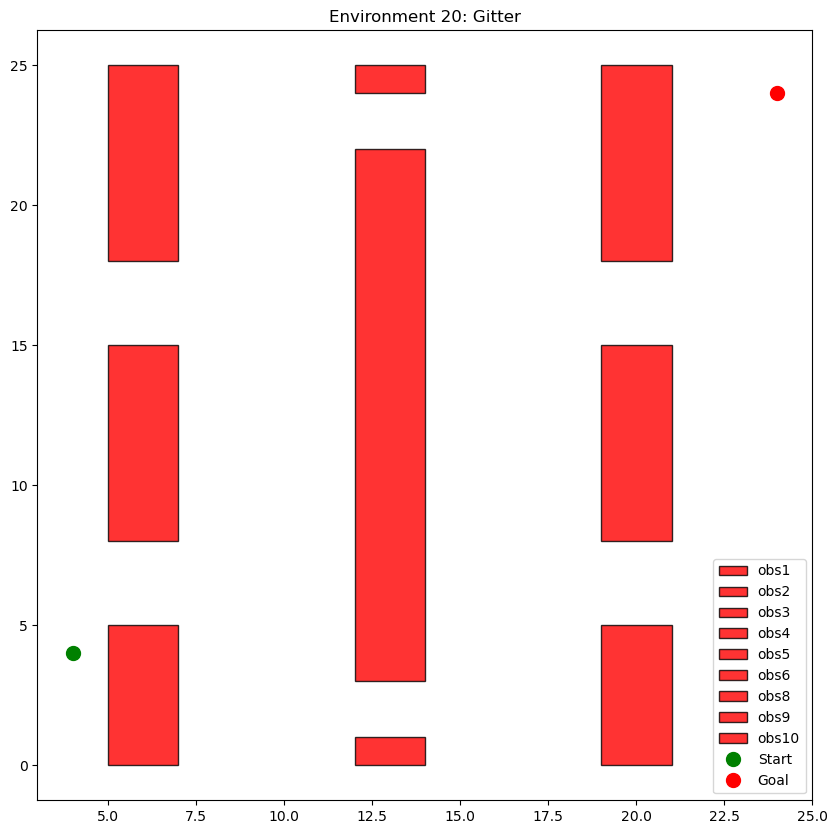

In [3]:
import matplotlib.pyplot as plt

def visualize_all_environments(fullBenchList):
    #for i, environment in enumerate(fullBenchList):
    i = 19
    environment = fullBenchList[i]
    print(f"Visualizing environment {i + 1}/{len(fullBenchList)}: {environment.name}")
    
    # Visualize the environment
    fig, ax = plt.subplots(figsize=(10, 10))
    environment.collisionChecker.drawObstacles(ax)
    
    # Draw start and goal points
    for start in environment.startList:
        ax.plot(start[0], start[1], 'go', markersize=10, label='Start')
    for goal in environment.goalList:
        ax.plot(goal[0], goal[1], 'ro', markersize=10, label='Goal')
    
    # Show the plot
    ax.set_title(f"Environment {i + 1}: {environment.name}")
    ax.legend()
    plt.show()

# Example usage
fullBenchList = IPTestSuiteSS2023.benchList
visualize_all_environments(fullBenchList)

### Test VisibilityPRM Custom

visibilityPRM_custom [<class 'IPVisibilityPRM_Customized.VisPRM_Custom'>, {'ntry': 300}, <function visibilityPRM_custom_Visualize at 0x7e8c381677e0>]
Planning: visibilityPRM_custom - Trap
ist in der methode
Graph und StatsHandler wurden zurückgesetzt
Start und Ziel überprüft: [[3, 20]], [[10, 10], [18, 18], [20, 3]]
Start- und Zielknoten zur StatsHandler hinzugefügt
Alle Knoten sind sichtbar: False
Startknoten zum Graph hinzugefügt
Zielknoten zum Graph hinzugefügt
Start und Ziel sind nicht sichtbar, Roadmap wird erstellt
Roadmap Lernschritt 0
Current node number: 4
New node number: 5
Knoten im Graphen:
['start', 'goal_1', 'goal_2', 'goal_3', 5, 7, 8, 10, 12]

Kanten im Graphen:
[(5, 12), (7, 10), (7, 12), (8, 10)]
Liste der Knoten im Graph (NotRoadmap): ['start', 'goal_1', 'goal_2', 'goal_3']
PosList: {'start': [3, 20], 'goal_1': [10, 10], 'goal_2': [18, 18], 'goal_3': [20, 3], 5: [2.5395811805101305, 4.883233079566319], 7: [21.071846853553545, 21.914286822527725], 8: [13.1682073655982

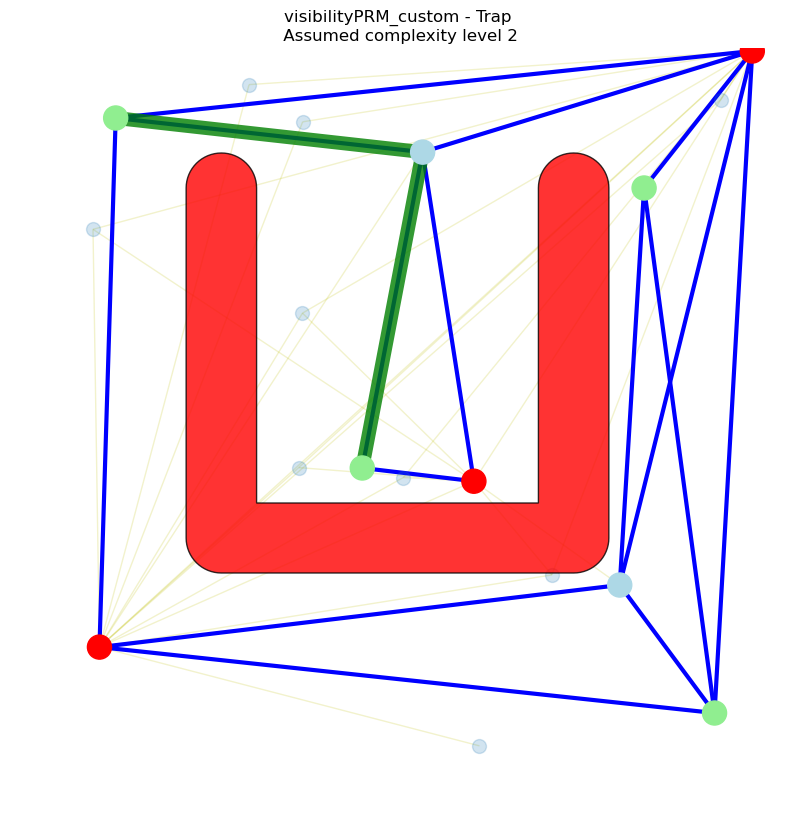

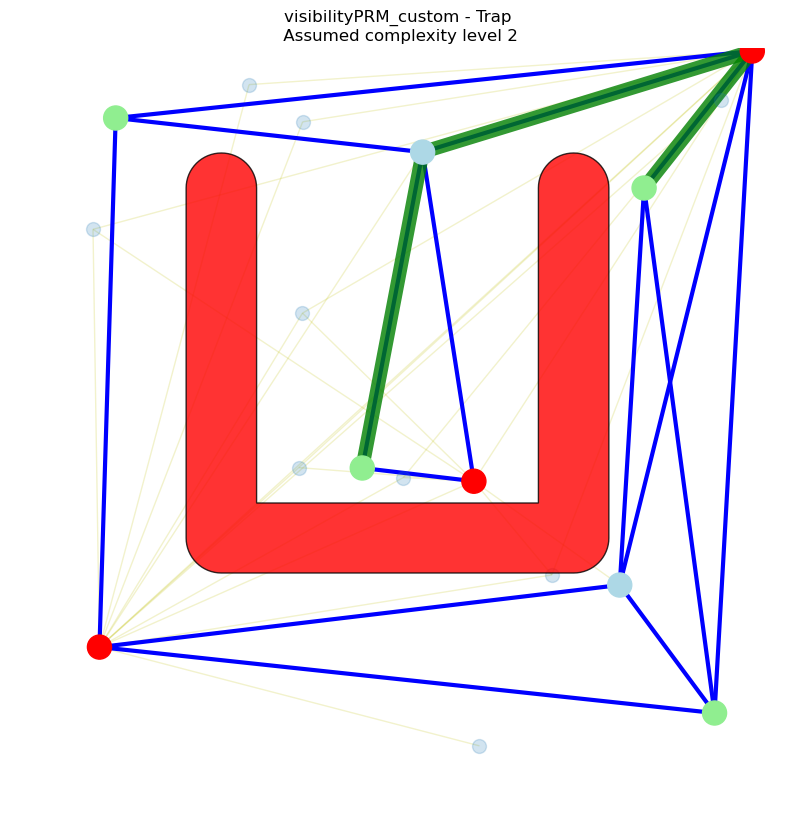

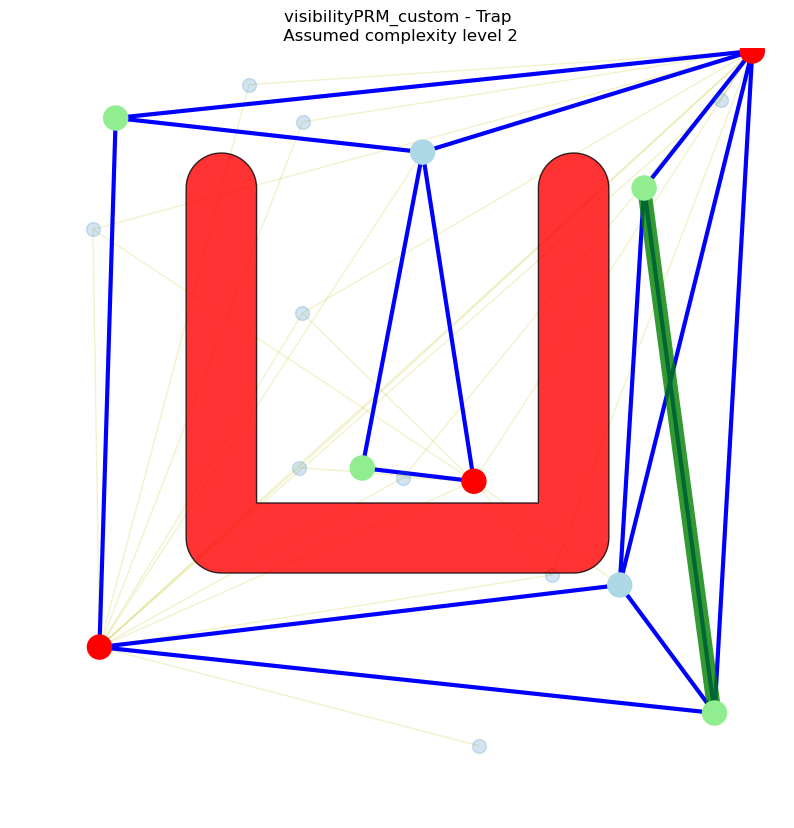

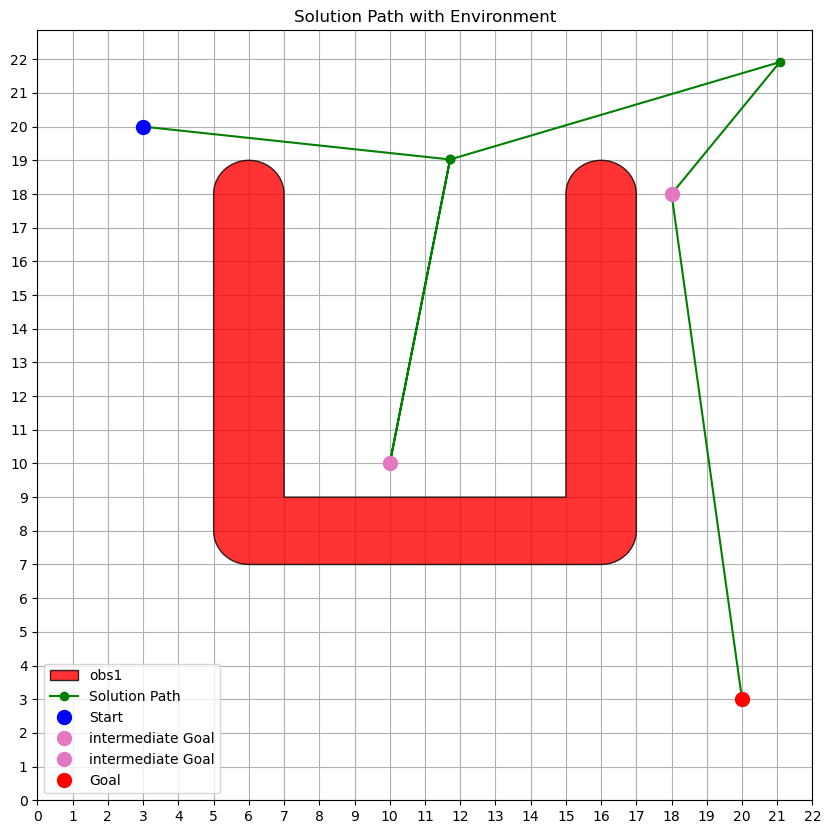

In [5]:
Environment_Test = fullBenchList[0]

StartList =[[3, 20]] 
GoalList = [[10, 10], [20,3], [18,18]]
Algorithm = "visibilityPRM_custom"

# Eingabe
MultiQuery = True

Planen = roundtrip_path_planner.Roundtrip_Path_Planner(StartList, GoalList, Environment_Test ,Algorithm)

# Aufruf
if MultiQuery:
    Planen.plan_MQ()
else:
    Planen.plan()
